# TODO:
- schedule time with John to review the python code and see what changed in OPR
- test to_index and index_to functions against lat-lon values to verify all of the conversions against each other
- rewrite any implementations of xy conversion to include the to_index and index_to functions
    - see if this stays consistent
- finally get around to fixing the flow vectors & headings
    - accuracy depends on accurate xy to lat-lon conversion
    - verify against online heading calculators
    - 
- verify neareast_unmasked_x_and_y function works
    - might have broken the search function in process of debugging conversions
        - may need rolling back from old code
- once all that works, probably ought to draw it all to a map and see if it all checks out. 

In [2]:
from project_classes import *
from functions import *
from iceflow_library import *

In [3]:
zoom = True
seg_length = 100
season = "2018_Antarctica_DC8" # a layerData season
season = "2016_Antarctica_DC8" # a season with both layer and layerData
# season = "2014_Antarctica_DC8" # a layerData season
flight = "20181030_01"  # the flight date and frame number
flight = "20181103_01"
# flight = "20181112_02"  # the problem flight
flight = "20161024_05"
# flight = '20141026_06'
file_name = "layer_export_" + flight + ".pickle"
testing = False

### read in the layers from the layer files and save them to a pickle file

In [4]:
# if the file at filename exists, read in the layers from the pickle file
# otherwise, read in the layers from the layer files and save them to a pickle file
# if not os.path.isfile(file_name):  # if the file does not exist
#     print(f"File {file_name} does not exist. Making it...")
#     # mat_pickler_layerData(season, flight, testing_mode=testing, layer=True)  # make it
#     mat_pickler_layerData(season, flight, testing_mode=testing, layer=False)  # make it
# mat_pickler_layerData(season, flight, testing_mode=testing)  # make it
mat_pickler_layer(season, flight, testing_mode=testing)  # make it
layers = read_layers(file_name)  # read in the layers from the pickle file

Reading data files...
--------------------
layer_attributes_file: layer_20161024_05.mat
DATA MAT FILE KEYS:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, type
LAYER ATTRIBUTES MAT FILE KEYS:
header, version, globals, file_type, file_version, lyr_age, lyr_age_source, lyr_desc, lyr_group_name, lyr_id, lyr_name, lyr_order, param
--------------------

debug:
data_mat type: <class 'dict'>
data_mat[0] keys:
header, version, globals, elev, file_type, file_version, gps_time, id, lat, lon, param, quality, twtt, typetwtt: [[5.54517000e-05 5.54517000e-05 5.54517000e-05 ... 5.83841740e-05
  5.83865502e-05 5.83890996e-05]
 [           nan            nan            nan ... 6.36720058e-05
  6.36575653e-05 6.36488182e-05]
 [           nan            nan            nan ...            nan
             nan            nan]]
twtt[0]: [5.54517000e-05 5.54517000e-05 5.54517000e-05 ... 5.83841740e-05
 5.83865502e-05 5.83890996e-05]
twtt[0][0]: 5.54517e-

### read in the iceflow data from the iceflow data files and save them to a pickle file

In [5]:
if not os.path.isfile("iceflow_data.pickle"):  # if the file does not exist
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")
# try:
iceflow_data = iceflow_loader("iceflow_data.pickle")
print("The iceflow data pickle file was found and loaded.")

x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]

The iceflow data pickle file was found and loaded.


# next step: continue working through crossover.py to rebuild the code

In [6]:
# if the file at filename exists, read in the intersection_indices and intersection_points from the pickle file
# otherwise, find the intersection_indices and intersection_points and save them to a pickle file
filename = f"{season}_{flight}_crossover_points.pickle"
if not os.path.isfile(filename):  # if the file does not exist
    print(f"File {filename} does not exist. Making it...")
    intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
    with open(filename, 'wb') as file:
        pickle.dump(intersection_indices, file)
        pickle.dump(intersection_points, file)
        pickle.dump(segment_ends, file)
    print(f"intersection_indices and intersection_points saved to {filename}")
else:
    with open(filename, 'rb') as file:
        intersection_indices = pickle.load(file)
        intersection_points = pickle.load(file)
        segment_ends = pickle.load(file)
    print(f"intersection_indices and intersection_points loaded from {filename}")

# intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
# # find the crossover points
# print(f"len(intersection_indices): {len(intersection_indices)}")
# print(f"len(intersection_points): {len(intersection_points)}")
# 
# # save to a pickle file named after the season and flight
# filename = f"{season}_{flight}_crossover_points.pickle"
# with open(filename, 'wb') as file:
#     pickle.dump(intersection_indices, file)
#     pickle.dump(intersection_points, file)
#     pickle.dump(segment_ends, file)
# print(f"intersection_indices and intersection_points saved to {filename}")


intersection_indices and intersection_points loaded from 2016_Antarctica_DC8_20161024_05_crossover_points.pickle


In [7]:
""" Current Project 30Jan24 """
# TODO: deconstruct the nested lists and make them make more sense

print(f"intersection_indices: {intersection_indices}")
print(f"intersection_points: {intersection_points}")

intersection_indices: [[27259, 110002], [33472, 108322], [43768, 105222], [54074, 103777], [58012, 64382], [59793, 81395], [60851, 82569], [66559, 101434], [78721, 99407], [91029, 94355]]
intersection_points: [[-81.11816244525122, -29.73509516444382], [-81.16768709742837, -28.30579867911967], [-81.23895935598836, -25.623889163118154], [-81.25529478543223, -24.353037639856126], [-81.54211694082927, -23.254932137952057], [-81.53829900294835, -21.64525117572498], [-81.66313025161077, -21.46914621408348], [-81.27279325012884, -22.284694479304264], [-81.23341834846097, -20.55596548970905], [-80.93188421539811, -16.63378474506194]]


In [8]:
# plot_layers_at_cross(layers, intersection_indices_base, intersection_points_base,cross_index=3, zoom=zoom)

# plot_layers_at_cross(layers, intersection_indices, intersection_points, cross_index=0, zoom=zoom)

In [9]:
# def nearest_flow_to_latlon(lat, lon, iceflow_data):
#     """
#     :param lat: the latitude of the point
#     :param lon: the longitude of the point
#     :param iceflow_data: the iceflow data
#     :return: the nearest iceflow data to the lat-lon point
#     """
#     # find the nearest x and y values in the iceflow data
#     x, y = latlon_to_xy(lat, lon)
#     x, y = find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)
#     flow = flow_at_x_y(x, y, iceflow_data)
#     return flow

# nearest_flow_to_latlon(intersection_points[0][0], intersection_points[0][1], iceflow_data)
# print the xy at intersection point
x_intersection, y_intersection = latlon_to_xy(intersection_points[0][0], intersection_points[0][1])
print(f"x: {x_intersection}, y: {y_intersection}")

x: -839579, y: 479569


In [10]:
# calculate the twtt at the crossover point on both segments
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
print(f"twtt: {twtt}")


twtt: [[3.189429995299016e-05, 3.204561655810654e-05], [3.45252e-05, 3.4615102766759925e-05], [nan, nan], [3.3373799999999995e-05, 3.2849779514319274e-05], [1.8413960828014443e-05, 1.857512450601765e-05], [3.3324268156376655e-06, 3.200836695807508e-06], [1.0508794373187518e-05, 5.4386216869077805e-06], [3.7474799999999996e-05, nan], [3.241379866212265e-05, 3.2358803905191436e-05], [3.331579781304637e-05, 3.488323693027917e-05]]


In [11]:
delta_twtt = twtt[0][1] - twtt[0][0]
print(f"delta_twtt: {delta_twtt}")

# find the angle and magnitude of the velocity at the crossover point
flow = nearest_flow_to_latlon(intersection_points[0][0], intersection_points[0][1], iceflow_data)
print(f"flow: {flow}")
angle = math.degrees(math.atan2(flow[1], flow[0]))
print(f"angle: {angle}")
magnitude = math.sqrt(flow[0] ** 2 + flow[1] ** 2)
print(f"magnitude: {magnitude}")

# find the heading of the first segment
heading_1 = find_heading(layers[0], intersection_indices[0][0])
print(f"heading_1: {heading_1}")

# find the heading of the second segment
heading_2 = find_heading(layers[0], intersection_indices[0][1])
print(f"heading_2: {heading_2}")

delta_twtt: 1.5131660511637695e-07
flow: (-4.0588593, 6.0907106)
angle: 123.67955223635134
magnitude: 7.319227780913986
lat-lon input to find_heading:
(-81.11816244525122, -29.73509516444382)
lat-lons determined by find_heading:
(-81.1301079229526, -29.774906893337896), (-81.10622556184101, -29.695228382885404)
heading_1: 27.296731944188767
lat-lon input to find_heading:
(-81.11491888011733, -29.819253423989757)
lat-lons determined by find_heading:
(-81.11805932746817, -29.734692394860527), (-81.11174872270742, -29.903738209261874)
heading_2: -76.49805266184431


In [12]:
# repeat the above for every crossover point
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
delta_twtt = []
flow = []
angle = []
magnitude = []
heading_1 = []
heading_2 = []
for i in range(len(intersection_indices)):
    print(f"twtt{i}: {twtt[i]}")
    
    delta_twtt.append(twtt[i][1] - twtt[i][0])
    print(f"delta_twtt[{i}]: {delta_twtt[i]}")

    # find the angle and magnitude of the velocity at the crossover point
    flow.append(nearest_flow_to_latlon(intersection_points[i][0], intersection_points[i][1], iceflow_data))
    print(f"flow[{i}]: {flow[i]}")
    angle.append(math.degrees(math.atan2(flow[i][1], flow[i][0])))
    print(f"angle[{i}]: {angle[i]}")
    magnitude.append(math.sqrt(flow[i][0] ** 2 + flow[i][1] ** 2))
    print(f"magnitude[{i}]: {magnitude[i]}")

    # find the heading of the first segment
    heading_1.append(find_heading(layers[0], intersection_indices[i][0]))
    print(f"heading_1[{i}]: {heading_1[i]}")

    # find the heading of the second segment
    heading_2.append(find_heading(layers[0], intersection_indices[i][1]))
    print(f"heading_2[{i}]: {heading_2[i]}")
    print(section_break)
    
    # TODO: check flow vector units and make sure it matches heading 
        # they do not, and further, the x and y are not in the same units as the lat-lon
        # needs to involve the conversion functions

length = len(delta_twtt)
while i < length:
    if math.isnan(delta_twtt[i]):
        delta_twtt.pop(i)
        flow.pop(i)
        angle.pop(i)
        magnitude.pop(i)
        heading_1.pop(i)
        heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed")
        print(section_break)
        length -= 1
    else:
        i += 1

twtt0: [3.189429995299016e-05, 3.204561655810654e-05]
delta_twtt[0]: 1.5131660511637695e-07
flow[0]: (-4.0588593, 6.0907106)
angle[0]: 123.67955223635134
magnitude[0]: 7.319227780913986
lat-lon input to find_heading:
(-81.11816244525122, -29.73509516444382)
lat-lons determined by find_heading:
(-81.1301079229526, -29.774906893337896), (-81.10622556184101, -29.695228382885404)
heading_1[0]: 27.296731944188767
lat-lon input to find_heading:
(-81.11491888011733, -29.819253423989757)
lat-lons determined by find_heading:
(-81.11805932746817, -29.734692394860527), (-81.11174872270742, -29.903738209261874)
heading_2[0]: -76.49805266184431
--------------------

twtt1: [3.45252e-05, 3.4615102766759925e-05]
delta_twtt[1]: 8.990276675992562e-08
flow[1]: (-4.0588593, 6.0907106)
angle[1]: 123.67955223635134
magnitude[1]: 7.319227780913986
lat-lon input to find_heading:
(-81.16768709742837, -28.30579867911967)
lat-lons determined by find_heading:
(-81.15575810335619, -28.265611395640185), (-81.17961

In [13]:
# plot delta_twtt vs |cos(angle - heading)| for each crossover point
import scipy.optimize as opt;


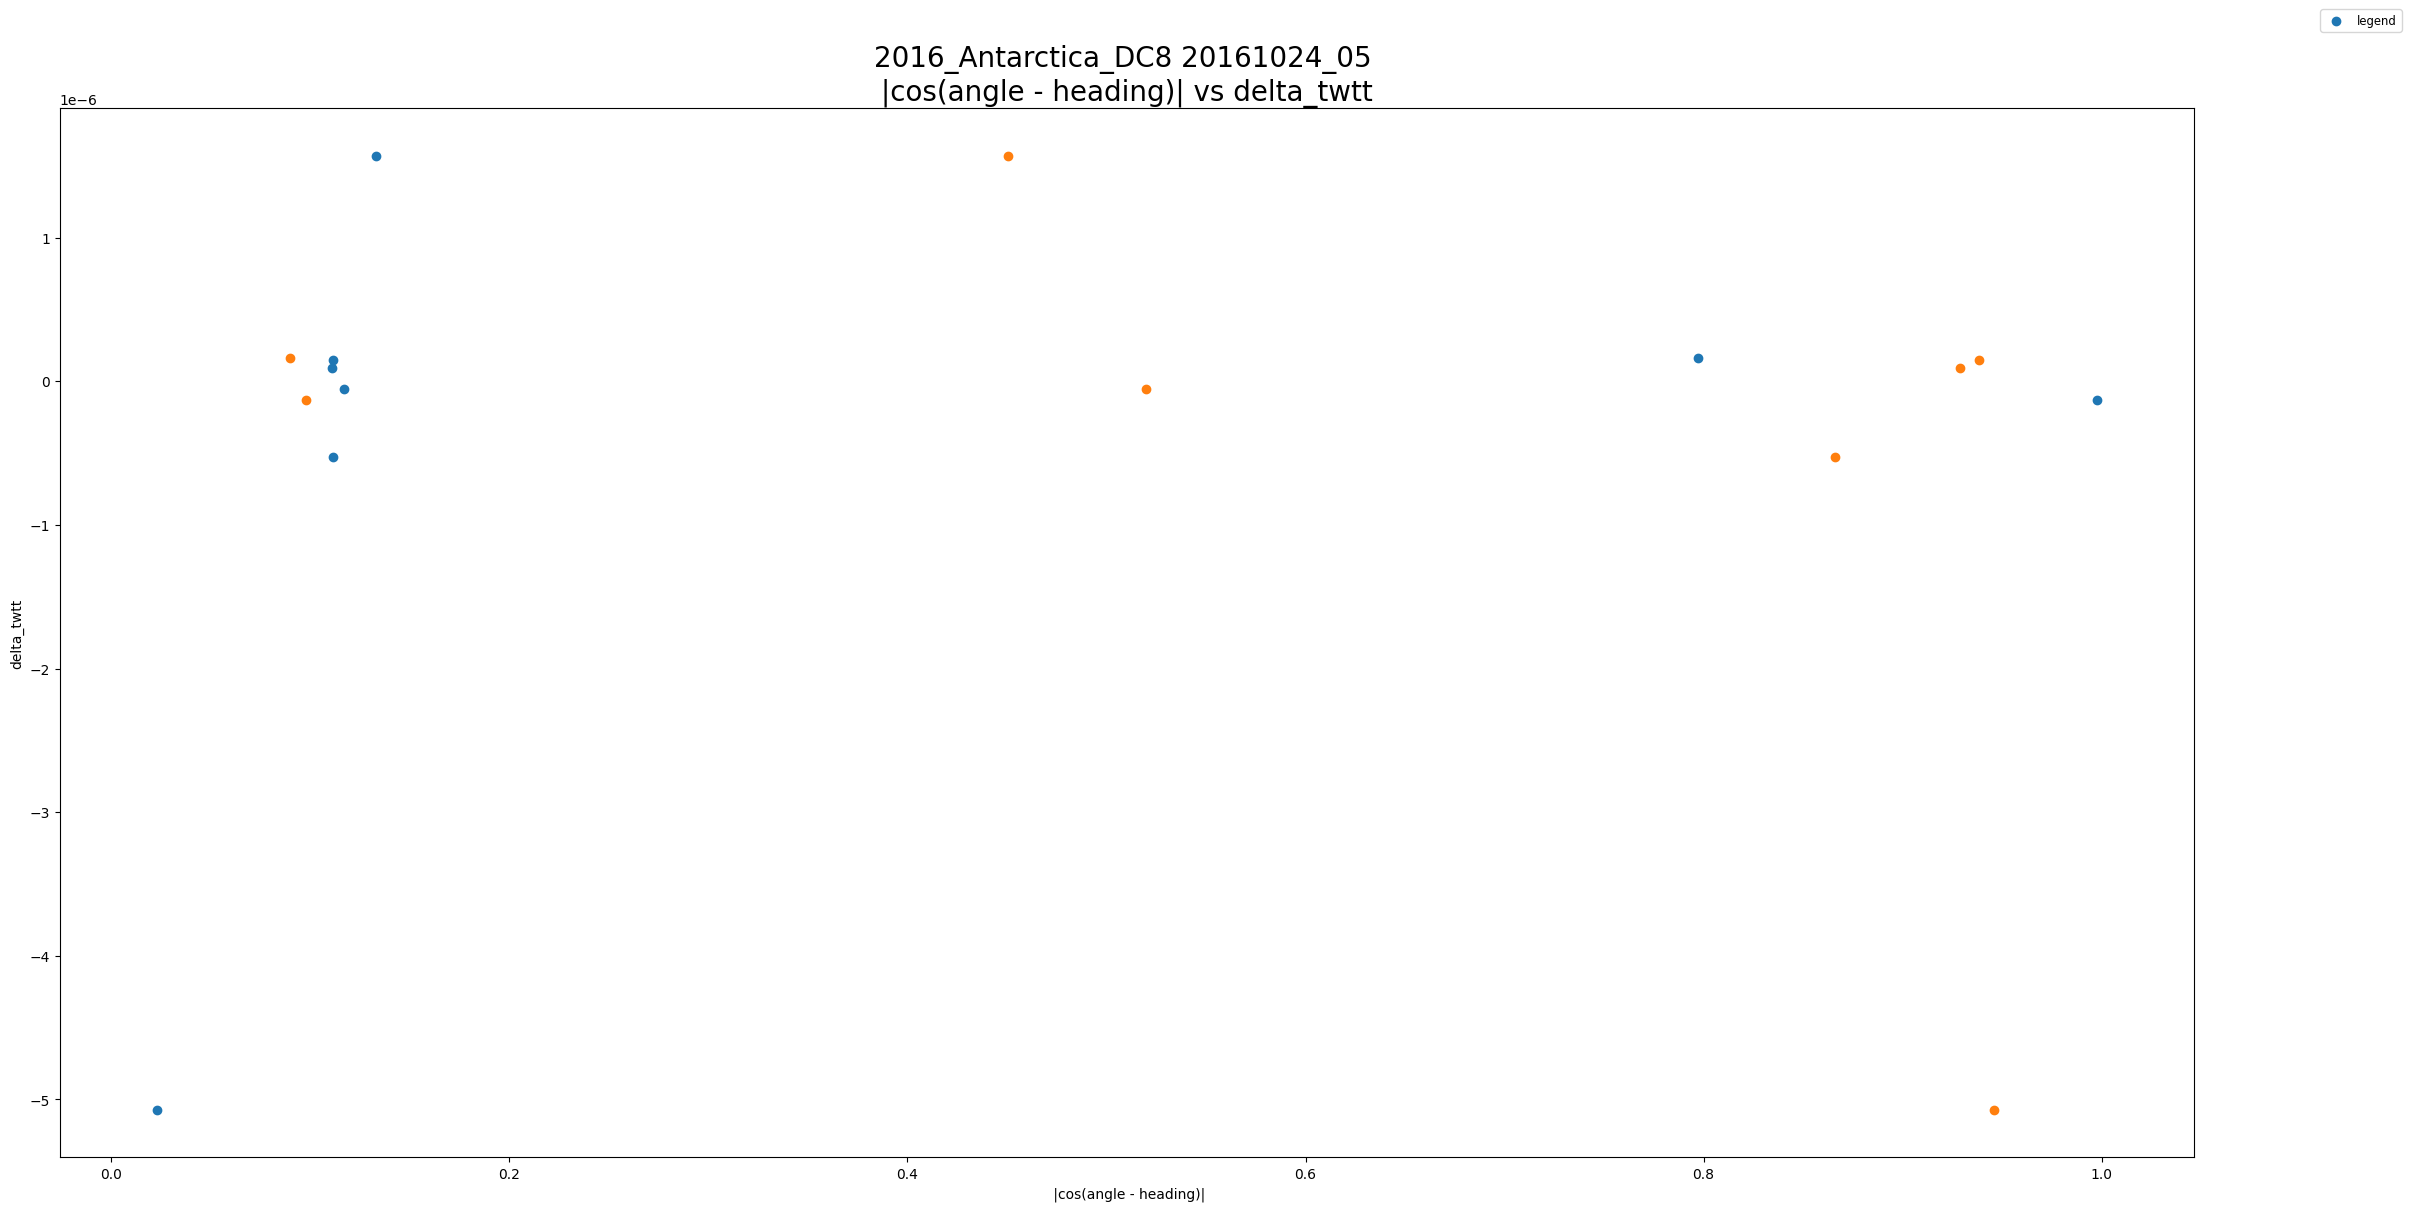

In [14]:
# plot delta_twtt vs |cos(angle - heading) - sin(angle - heading)| * |magnitude|  for each crossover point
plt.figure(figsize=(24, 12), layout='constrained')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 1')
# plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_2)))) * np.abs(np.array(magnitude)), delta_twtt, label='segment 2')


plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1)))), delta_twtt, label='segment 1')
plt.scatter(np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_2)))), delta_twtt, label='segment 2')

# plt.xlabel(" |cos(angle - heading)| * |velocity|")
plt.xlabel(" |cos(angle - heading)|")
plt.ylabel("delta_twtt")
# plt.title(" |cos(angle - heading)| vs delta_twtt")
plt.title(f"{season} {flight} \n|cos(angle - heading)| vs delta_twtt", fontsize=20)

plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))
# scale axes to be logarithmic
# plt.xscale('log')
# plt.yscale('log')


# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{season}_{flight}_cos_angle_heading_vs_delta_twtt_linear.png", dpi=300)

# plt.show()

# plt.yscale('log')
# save the plot as a png file with a high dpi named after the season and flight
# plt.savefig(f"{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)
plt.show()


In [15]:
# x_data = np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1))))
# y_data = delta_twtt
# 
# # Define the Gaussian function
# def gaussian(x, amplitude, mean, stddev):
#     return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
# 
# # Initial parameter guesses: amplitude close to your data's scale, mean around the center, and a reasonable stddev
# initial_guesses = [1e-8, 0.5, 0.1]
# 
# # Use curve_fit to fit the Gaussian function to your data
# popt, pcov = opt.curve_fit(gaussian, x_data, y_data, p0=initial_guesses, maxfev=5000)
# 
# # Plot the original data
# plt.scatter(x_data, y_data, label='Data')
# 
# # Plot the fitted curve
# x_fit = np.linspace(min(x_data), max(x_data), 1000)
# y_fit = gaussian(x_fit, *popt)
# plt.plot(x_fit, y_fit, color='red', label='Fitted curve')
# 
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# plt.title('Gaussian Fit to Data')
# plt.legend()
# plt.show()

ntuple-ize
    cos(heading-flow)
    difference in theta paralell and perpindicular
    delta_twtt
    v_flow
- stop selecting for angle in upper cells, we can cut the data once we have it

ARA meeting in March Columbus
- talk to Kiet about how he is setting up travel

In [16]:
heading = []
# for each plane heaading, add [heading_1, heading_2] to the heading list
for i in range(len(heading_1)):
    heading.append([heading_1[i], heading_2[i]])

In [17]:
print(flow)

[(-4.0588593, 6.0907106), (-4.0588593, 6.0907106), (-4.139361, 6.097025), (-4.180656, 6.1327734), (-4.103491, 6.127822), (-4.180656, 6.1327734), (-4.103491, 6.127822), (-4.180656, 6.1327734), (-4.180656, 6.1327734), (-4.216264, 6.1637797)]


In [18]:
# # save the posit to a json file
# import json
# 
# filename = f"{season}_crossover_data.json"
# 
# # check to see if the file exists and if it does, load the data from it, otherwise append the data to a new file
# try:
#     with open(filename, 'r') as file:
#         data = json.load(file)
#         print(f"File {filename} exists. Loading data from file...")
# except FileNotFoundError:
#     print(f"File {filename} does not exist. Creating a new file...")
#     data = []
#     
# # if the data is not already in the file, append the data to the file
# if data:
#     print(f"Data already in file {filename}.")
# else:
#     print(f"Appending data to file {filename}...")
#     data.append({
#         "season": season,
#         "flight": flight,
#         "intersection_points": intersection_points,
#         "twtt": twtt,
#         "delta_twtt": delta_twtt,
#         "ice flow vectors (m/yr, in xy)": flow,
#         "ice flow angle": angle,
#         "ice flow magnitude": magnitude,
#         "plane heading": heading
#     })
#     with open(filename, 'w') as file:
#         json.dump(data, file)
#     print(f"Data successfully appended to file {filename}.")
# 
# 
# # TODO: convert flow vector and angle to EPSG:4326

### vector to heading dev below, DELETE WHEN FUNCTIONAL

In [19]:
def nearest_flow_to_latlon(lat, lon, iceflow_data, print_point=False):
    """
    :param lat: the latitude of the point
    :param lon: the longitude of the point
    :param iceflow_data: the iceflow data
    :return: the nearest flow vector to the lat-lon point available in the iceflow data 
    """
    # find the nearest x and y values in the iceflow data
    x, y = latlon_to_xy(lat, lon)
    x, y = find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)
    if print_point:
        print(f"Nearest point to lat-lon: {xy_to_latlon(x, y)} or {x, y} in EPSG:3031")
    flow = flow_at_x_y(x, y, iceflow_data)
    return flow

In [20]:
intersect_x = intersection_points[0][0]
intersect_y = intersection_points[0][1]
print(f"Intersection lat-lon:\n{intersect_x, intersect_y}")
print("----------------------\n")

x, y = latlon_to_xy(intersect_x, intersect_y)
print(f"x, y of intersection before index conversion \nx: {x}, y: {y}\n")

x_index = x_to_index(x)
y_index = y_to_index(y)
print(f"converted to indices:\nx_index: {x_index}, y_index: {y_index}\n")
x_lat, y_lat = xy_to_latlon(x_index, y_index)
print(f"lat-lon of indices: \n{x_lat, y_lat}\n")

difference_lat = intersect_x - x_lat
difference_lon = intersect_y - y_lat
print(f"difference in lat-lon: \n{difference_lat, difference_lon}\n")
# So the conversion functions work

Intersection lat-lon:
(-81.11816244525122, -29.73509516444382)
----------------------

x, y of intersection before index conversion 
x: -839579, y: 479569

converted to indices:
x_index: 4358, y_index: 5158

lat-lon of indices: 
(-81.12660163166306, 330.27939665579146)

difference in lat-lon: 
(0.00843918641184871, -360.01449182023526)


In [21]:
# def find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=100):
#     """
#     Find the nearest x and y value in the iceflow data to an input x and y value.
#     If the ice velocity is masked at that point, it will return the next nearest point that is not masked.
#     """
#     # x_index_base = (np.abs(iceflow_data[0] - x)).argmin()  
#     # y_index_base = (np.abs(iceflow_data[1] - y)).argmin()  
#     
#     x_index_base = x
#     y_index_base = y
#     # the index bases are
#     print(f"x_index_base: {x_index_base}, y_index_base: {y_index_base}")
# 
#     # for x_offset, y_offset in generate_spiral_indices(0, 0, max_radius=max_radius):
#     for x_offset, y_offset in generate_spiral_indices(x_index_base, y_index_base, max_radius=max_radius):
#         # x_index = x_index_base + x_offset
#         # y_index = y_index_base + y_offset
#         x_index = x_offset
#         y_index = y_offset
#         # print(f"x_index: {x_index}, y_index: {y_index}")
#         if (
#                 0 <= x_index < iceflow_data[2].shape[0]  # if the x index is within the bounds of the iceflow data
#                 and 0 <= y_index < iceflow_data[2].shape[1]
#                 
#                 # np.min(iceflow_data[2]) <= x_index <= np.max(iceflow_data[2])  # if the x index is within the bounds of the iceflow data
#                 # and np.min(iceflow_data[3]) <= y_index <= np.max(iceflow_data[3])
#         
#                 and not np.ma.is_masked(iceflow_data[2][x_index][y_index])
#                 and not np.ma.is_masked(iceflow_data[3][x_index][y_index])
#         ):
#             return x_index, y_index
#         # else:
#             # print(f"no unmasked point found within {max_radius} of {x_index_base, y_index_base}")
#             
#     # Return the original indices if no unmasked point is found in the search area
#     if x_index_base == x and y_index_base == y:
#         print(f"no unmasked point found within {max_radius} of {x_index_base, y_index_base}")
#         return None, None
#     return x_index_base, y_index_base

def find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=100):
    """
    Find the nearest x and y value in the iceflow data to an input x and y value.
    If the ice velocity is masked at that point, it will return the next nearest point that is not masked.
    """
    x_index_base = (np.abs(iceflow_data[0] - x)).argmin()
    y_index_base = (np.abs(iceflow_data[1] - y)).argmin()

    # for x_offset, y_offset in generate_spiral_indices(0, 0, max_radius=max_radius):
    for x_offset, y_offset in generate_spiral_indices(x_index_base, y_index_base, max_radius=max_radius):
        x_index = x_index_base + x_offset
        y_index = y_index_base + y_offset

        if (
                0 <= x_index < iceflow_data[2].shape[0]
                and 0 <= y_index < iceflow_data[2].shape[1]
                and not np.ma.is_masked(iceflow_data[2][x_index][y_index])
                and not np.ma.is_masked(iceflow_data[3][x_index][y_index])
        ):
            return x_index, y_index

    # Return the original indices if no unmasked point is found in the search area
    return x_index_base, y_index_base

In [22]:
def dumbsearch(x, y, iceflow_data, max_radius=100):
    """
    Find the nearest x and y value in the iceflow data to an input x and y value.
    """
    # iterate through every data point within the max_radius of the input x and y and save the xy pairs of any unmasked data
    unmasked = []
    for x_index in range(x - max_radius, x + max_radius):
        for y_index in range(y - max_radius, y + max_radius):
            if (
                    0 <= x_index < iceflow_data[2].shape[0]  # if the x index is within the bounds of the iceflow data
                    and 0 <= y_index < iceflow_data[2].shape[1]
                    and not np.ma.is_masked(iceflow_data[2][x_index][y_index])
                    and not np.ma.is_masked(iceflow_data[3][x_index][y_index])
            ):
                unmasked.append((x_index, y_index))
    # find the xy pair with the minimum distance from the input x and y
    min_distance = 100
    min_x = None
    min_y = None
    for x_index, y_index in unmasked:
        distance = math.sqrt((x - x_index) ** 2 + (y - y_index) ** 2)
        if distance < min_distance:
            min_distance = distance
            min_x = x_index
            min_y = y_index
    return min_x, min_y

### TODO: solve lower TODO first and return to this one. If still an issue, identify why the longitude is coming out wrong.
- Current incorrect output:
```
Intersection lat-lon:
(-81.11816244525122, -29.73509516444382)

x, y of intersection before index conversion 
x: -839579, y: 479569

converted to indices:
x_index: 8088, y_index: 5158

lat-lon of indices: 
(-81.12103815972404, 209.70003050433414)

difference in lat-lon: 
(0.0028757144728217554, -239.43512566877797)
```

In [23]:
x_unmasked, y_unmasked = find_nearest_unmasked_x_and_y(x, y, iceflow_data, max_radius=1000)
print(f"x: {x}, y: {y}\nunmasked x: {x_unmasked}, unmasked y: {y_unmasked}")

#TODO: try plotting the spiral directly from the points in find_nearest_unmasked_x_and_y above to verify that it is working. loop through and check if the data is masked or present at each point and return any valid points`
# alternatively just nested loop through from x-100 to x+100 and y-100 to y+100 and check if the data is masked or present at each point and return any valid points

# print(f"shape: {iceflow_data[2].shape[1]}")
# print the min and max values of the iceflow data
# print(f"min x: {np.min(iceflow_data[0])}, max x: {np.max(iceflow_data[0])}")

x: -839579, y: 479569
unmasked x: 8712, unmasked y: 10314


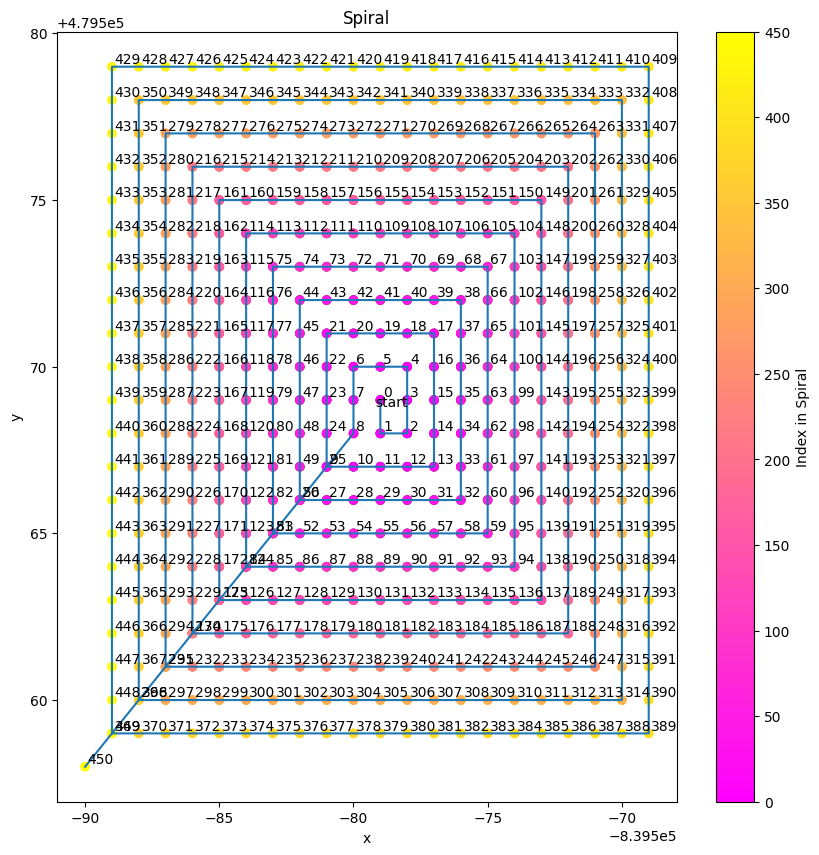

In [24]:
# plot the spiral around the point
plot_spiral(x,y, 10)

In [25]:
#print x min and max
min = np.min(iceflow_data[0])
max = np.max(iceflow_data[0])

print(f"min: {min}, max: {max}")

print(f"min/450: {min/450}, max/450: {max/450}")

one, two, three = (iceflow_data[1][0], iceflow_data[1][1], iceflow_data[1][2])
print(f"one: {one}, two: {two}, three: {three}")
print(f"one - two: {one - two}, two - three: {two - three}")

min: -2800000.0, max: 2799800.0
min/450: -6222.222222222223, max/450: 6221.777777777777
one: 2800000.0, two: 2799550.0, three: 2799100.0
one - two: 450.0, two - three: 450.0


In [26]:
def x_to_index(x):
    return 6223 + int(x/450)
def y_to_index(y):
    return 6223 - int(y/450)
def index_to_x(x):
    return (x - 6223) * 450
def index_to_y(y):
    return (6223 - y) * 450

# ~~TODO: see if these are even legal lat-lon values~~
- **they are not but neither are the iceflow data values**
- some of these longitudes don't work in Google Earth, I think they are supposed to be between -180 and 180
- more importantly, are the icflow data and CReSIS lat-lon values in this format (i.e. if they are wrong, stay wrong)

Iceflow data: 
    - max lat: -89.9 - 0 degrees
    - min lat: 0 - 359.79 degrees
    

In [27]:
x = 6000
y = 1000
print(f"starting values\nx: {x}, y: {y}")
x_index = x_to_index(x)
y_index = y_to_index(y)
print(f"x_index: {x_index}, y_index: {y_index}")
print(f"x: {iceflow_data[0][x_index]}, y: {iceflow_data[1][y_index]}\n")

x = 9000
y = 5000
print(f"starting values\nx: {x}, y: {y}")
x_index = x_to_index(x)
y_index = y_to_index(y)
print(f"x_index: {x_index}, y_index: {y_index}")
print(f"x: {iceflow_data[0][x_index]}, y: {iceflow_data[1][y_index]}\n")



starting values
x: 6000, y: 1000
x_index: 6236, y_index: 6221
x: 6200.0, y: 550.0

starting values
x: 9000, y: 5000
x_index: 6243, y_index: 6212
x: 9350.0, y: 4600.0


In [28]:
def xy_vector_to_heading(x, y, x_vector, y_vector):
    """
    This function is used to convert an x and y vector in EPSG:3031 to a heading in EPSG:4326.
    :param x: the x coordinate
    :param y: the y coordinate
    :param x_vector: the x vector
    :param y_vector: the y vector
    :return: the heading in EPSG:4326
    """
    # convert the x and y coordinates to lat and lon
    lat, lon = xy_to_latlon(x, y)
    # convert the x and y vector to lat and lon
    lat_vector, lon_vector = xy_to_latlon(x + x_vector, y + y_vector)
    # calculate the heading
    geodesic = pyproj.Geod(ellps='WGS84')
    angle1,angle2,distance = geodesic.inv(lon, lat, lon_vector, lat_vector)
    return angle1



# TODO: take some plane vectors, convert the relevant points to xy, then run them through the heading function to see if it works compared to the plane heading

In [63]:
# for testing purposes only, delete when done
def find_heading_test(lat1, lon1, lat2, lon2):
    # print the lat-lon points
    # print(f"lat-lon input to find_heading:"
    #       f"\n({layer.lat[index]}, {layer.lon[index]})")
    geodesic = pyproj.Geod(ellps='WGS84')
    # lon = layer.lon[index]
    # lat = layer.lat[index]
    # lon1 = layer.lon[index - window_size]
    # lat1 = layer.lat[index - window_size]
    # lon2 = layer.lon[index + window_size]
    # lat2 = layer.lat[index + window_size]

    print(f"lat-lons determined by find_heading:"
          f"\n({lat1}, {lon1}), ({lat2}, {lon2})")
    # delta_lon1 = lon - lon1
    # delta_lat1 = lat - lat1
    # delta_lon2 = lon2 - lon
    # delta_lat2 = lat2 - lat
    # print(f"delta_lon1: {delta_lon1}, delta_lat1: {delta_lat1}, delta_lon2: {delta_lon2}, delta_lat2: {delta_lat2}")
    fwd_azimuth, back_azimuth, distance = geodesic.inv(lon1, lat1, lon2, lat2)
    return fwd_azimuth

In [64]:
def find_heading_points(layer, index, window_size=100):
    """
    :param layer: a Layer object
    :param index: the index of the point in the layer
    :param window_size: the number of points to use in the slope calculation
    :return: the bearing of the current that flew through the points.
    This has nothing to do with the slope of the layer. only the lat-lon points.
    """
    # print the lat-lon points
    print(f"lat-lon input to find_heading:"
          f"\n\t({layer.lat[index]}, {layer.lon[index]})")
    geodesic = pyproj.Geod(ellps='WGS84')
    lon = layer.lon[index]
    lat = layer.lat[index]
    lon1 = layer.lon[index - window_size]
    lat1 = layer.lat[index - window_size]
    lon2 = layer.lon[index + window_size]
    lat2 = layer.lat[index + window_size]
    
    return lon1, lat1, lon2, lat2

In [67]:
# TODO: when this works, udpate the original code cell to use the non test versions of the iceflow heading function
# TODO, the iceflow heading finder doesn't work on too close of data because they show up as the same index in the iceflow data.
    # put in some larger fake lat-lons to test both
    # how was it working before then?
        # the flow vector comes from the data so it works
magnitude = []
heading_1 = []
heading_2 = []
# for i in range(len(intersection_indices)):
for i in range(1):
    # find the heading of the first segment
    test_lat1 = -81.1 
    test_lon1 = -29.7
    test_lat2 = -81.2
    test_lon2 = -29.8
    heading_1.append(find_heading_test(test_lat1, test_lon1, test_lat2, test_lon2))
    print(f"heading_1[{i}]: {heading_1[i]}")
    
    print("**************")

    # convert the test lat-lon points to xy
    x1, y1 = latlon_to_xy(test_lat1, test_lon1) 
    x2, y2 = latlon_to_xy(test_lat2, test_lon2)
    print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")
    
    # convert the xy points to indices
    x1_index = x_to_index(x1)
    y1_index = y_to_index(y1)
    x2_index = x_to_index(x2)
    y2_index = y_to_index(y2)
    print(f"x1_index: {x1_index}, y1_index: {y1_index}, x2_index: {x2_index}, y2_index: {y2_index}")
    
    # TODO: should this be a vector of indices or x and y? x and y sounds right but it errors out on index overflow. Have to go to class so can't look right now. Does the xy_vector function use indices or x and y? 
    # vector = [x2_index - x1_index, y2_index - y1_index]
    vector = [x2 - x1, y2 - y1]

    # convert the vector to a heading
    heading = xy_vector_to_heading(x1_index, y1_index, vector[0], vector[1])
    
    print(f"heading by way of iceflow functions: \n{heading}")
    
    
    
    print(section_break)
    
    


lat-lons determined by find_heading:
(-81.1, -29.7), (-81.2, -29.8)
heading_1[0]: -171.30175278944094
**************
x1: -841597, y1: 480038, x2: -831275, y2: 476075
x1_index: 4353, y1_index: 5157, x2_index: 4376, y2_index: 5166


IndexError: index 14675 is out of bounds for axis 0 with size 12445